In [29]:
from tensorflow import keras

from keras.models import Sequential

from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
from matplotlib import pyplot as plt

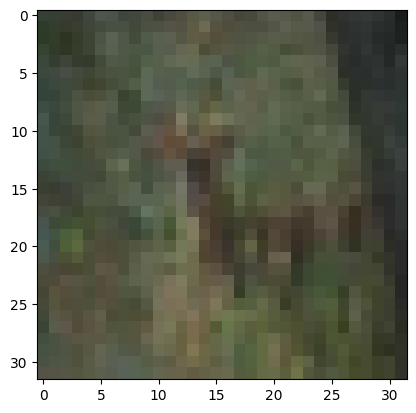

In [10]:
plt.imshow(x_train[10])

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
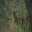

In [15]:
x_train[10]

In [13]:
y_train[10]

array([4], dtype=uint8)

In [14]:
y_train.shape

(50000, 1)

In [30]:
model=Sequential()

model.add(Conv2D(input_shape=(32,32,3),filters=96,kernel_size=11,strides=4,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))

model.add(Conv2D(filters=256,kernel_size=5,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))

model.add(Conv2D(filters=384,kernel_size=3,strides=1,padding='same',activation='relu'))

model.add(Conv2D(filters=384,kernel_size=3,strides=1,padding='same',activation='relu'))  # k=3 means p=1,k5p2,k7p3,k9p4,k11p5


model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))

model.add(Flatten())

model.add(Dense(units=4096,activation='relu'))
model.add(Dropout(rate=0.30))
model.add(Dense(units=4096,activation='relu'))
model.add(Dropout(rate=0.30))

model.add(Dense(units=10,activation='softmax'))


model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 8, 8, 96)       │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 4, 4, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,622,154 (82.48 MB)

 Trainable params: 21,622,154 (82.48 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [36]:
model_train_generator=model.fit(x=x_train,y=y_train,epochs=10,verbose='auto',validation_data=(x_test,y_test))

Epoch 1/10
   9/1563 ━━━━━━━━━━━━━━━━━━━━ 26:04 1s/step - loss: 2.0808 - sparse_categorical_accuracy: 0.2505   

KeyboardInterrupt: 

In [ ]:
model.evaluvate(x_test,y_test)

In [ ]:
pred=model.predict(x_test)

In [ ]:
import numpy as np

In [ ]:
np.argmax(pred[0])

In [ ]:
plt.imshow(x_test[0])

In [ ]:
x_test[0]

In [ ]:
y_test[0]

# Normalization

In [37]:
x_trainn=x_train/255
x_testn=x_test/255

In [38]:
model_train_generator=model.fit(x=x_trainn,y=y_train,epochs=10,verbose='auto',validation_data=(x_testn,y_test))

Epoch 1/10
  15/1563 ━━━━━━━━━━━━━━━━━━━━ 16:19 633ms/step - loss: 2.3104 - sparse_categorical_accuracy: 0.0890

KeyboardInterrupt: 